In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Загружаем данные
df = pd.read_csv('/kaggle/input/heart-train/heart_train.csv')

In [38]:
# Удаляем лишние колонки
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [39]:
# Смотрим первые строки
print(df.head())

        Age  Cholesterol  Heart rate  Diabetes  Family History  Smoking  \
0  0.359551     0.732143    0.074244       1.0             1.0      1.0   
1  0.202247     0.325000    0.047663       1.0             1.0      0.0   
2  0.606742     0.860714    0.055912       1.0             0.0      1.0   
3  0.730337     0.007143    0.053162       0.0             0.0      1.0   
4  0.775281     0.757143    0.021998       0.0             0.0      1.0   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0      1.0                  1.0                 0.535505     1  ...   
1      0.0                  1.0                 0.068690     2  ...   
2      1.0                  1.0                 0.944001     2  ...   
3      0.0                  1.0                 0.697023     0  ...   
4      0.0                  1.0                 0.412878     1  ...   

   Physical Activity Days Per Week  Sleep Hours Per Day  \
0                              3.0             0.333333   
1   

In [40]:
# Информация о колонках
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8685 non-null   float64
 1   Cholesterol                      8685 non-null   float64
 2   Heart rate                       8685 non-null   float64
 3   Diabetes                         8442 non-null   float64
 4   Family History                   8442 non-null   float64
 5   Smoking                          8442 non-null   float64
 6   Obesity                          8442 non-null   float64
 7   Alcohol Consumption              8442 non-null   float64
 8   Exercise Hours Per Week          8685 non-null   float64
 9   Diet                             8685 non-null   int64  
 10  Previous Heart Problems          8442 non-null   float64
 11  Medication Use                   8442 non-null   float64
 12  Stress Level        

In [41]:
# Описательные статистики
print(df.describe())

               Age  Cholesterol   Heart rate     Diabetes  Family History  \
count  8685.000000  8685.000000  8685.000000  8442.000000     8442.000000   
mean      0.449958     0.501070     0.050658     0.652097        0.489576   
std       0.231174     0.284716     0.023453     0.476333        0.499921   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.258427     0.267857     0.034830     0.000000        0.000000   
50%       0.460674     0.499780     0.050412     1.000000        0.000000   
75%       0.640449     0.746429     0.065995     1.000000        1.000000   
max       1.000000     1.000000     1.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8442.000000  8442.000000          8442.000000              8685.000000   
mean      0.902867     0.498342             0.601990                 0.503378   
std       0.296157     0.500027             0.489517           

In [42]:
# Проверим количество пропусков
print(df.isnull().sum())

Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           243
Family History                     243
Smoking                            243
Obesity                            243
Alcohol Consumption                243
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            243
Medication Use                     243
Stress Level                       243
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    243
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Gender                               0
Systolic blood pressure              0
Diastolic blood pressure 

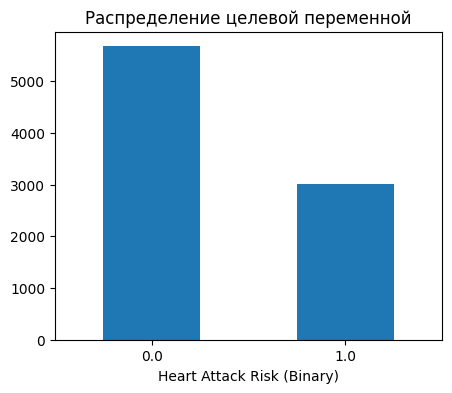

In [43]:
# Распределение целевой переменной
plt.figure(figsize=(5,4))
df["Heart Attack Risk (Binary)"].value_counts().plot(kind="bar")
plt.title("Распределение целевой переменной")
plt.xticks(rotation=0)
plt.show()

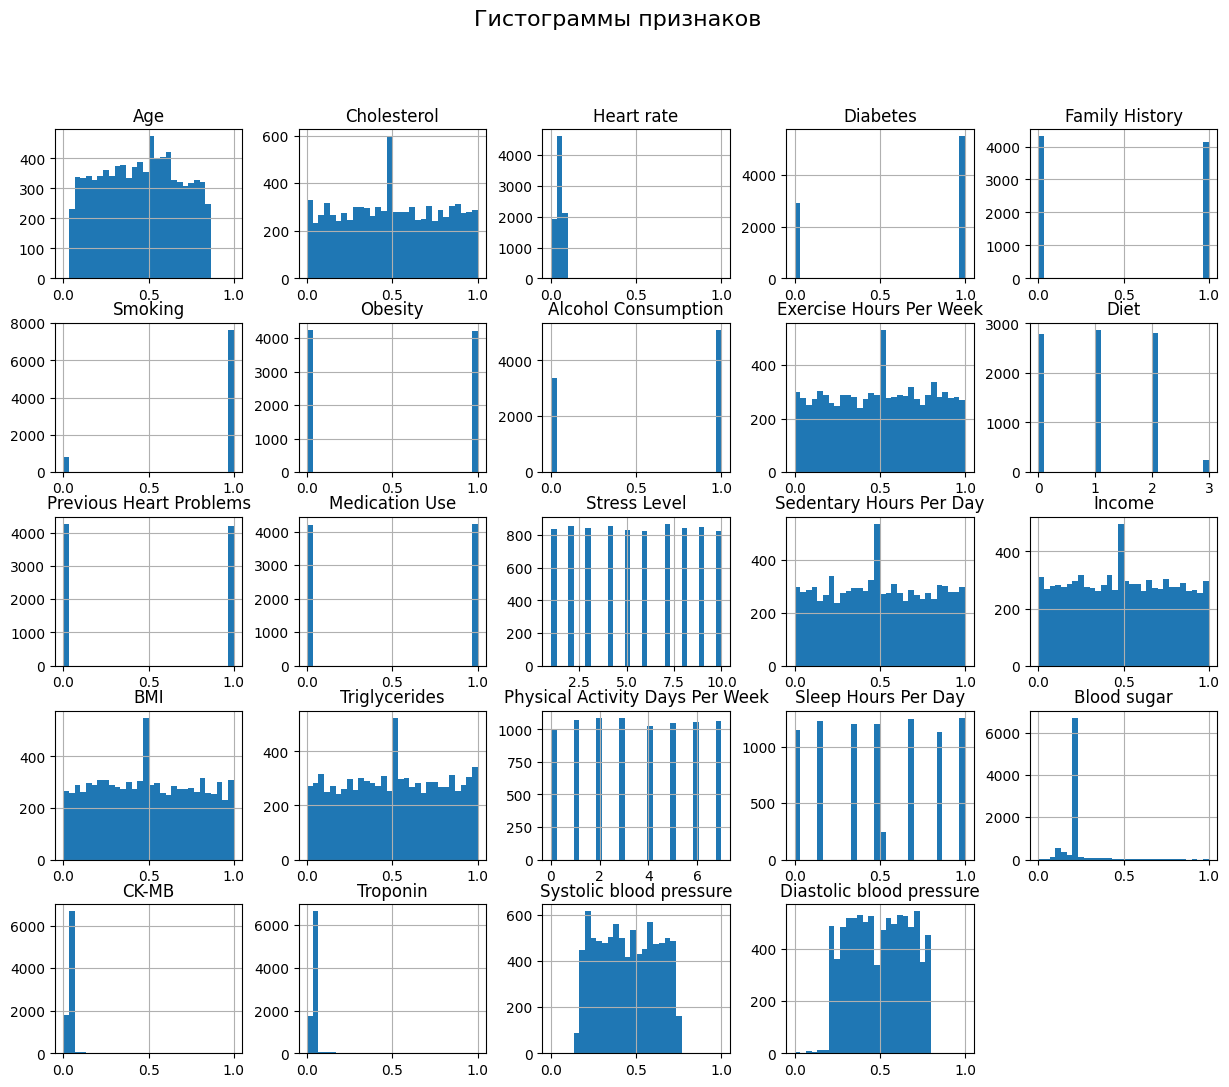

In [44]:
# Гистограммы по признакам
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['id', 'Heart Attack Risk (Binary)'])
df[numerical_cols].hist(bins=30, figsize=(15, 12))
plt.suptitle("Гистограммы признаков", fontsize=16)
plt.show()

In [45]:
df_corr = df.select_dtypes(include=['number']).drop(columns=['id'])

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


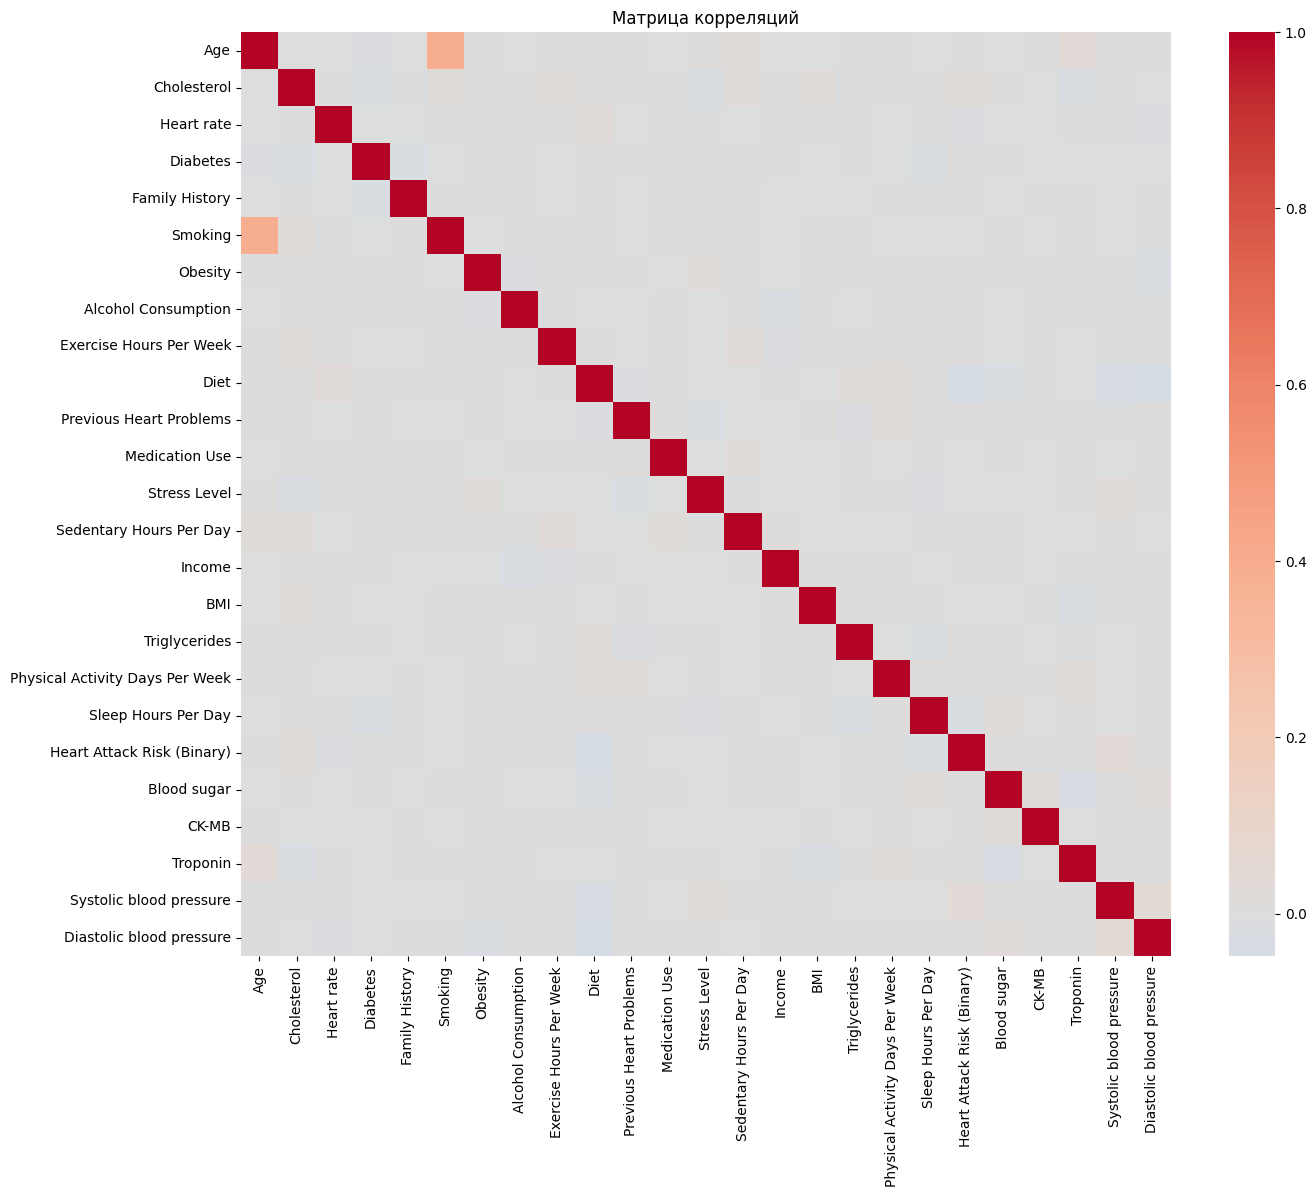

In [46]:
# Корреляционная матрица
plt.figure(figsize=(15, 12))
sns.heatmap(df_corr.corr(), cmap='coolwarm', center=0)
plt.title("Матрица корреляций")
plt.show()

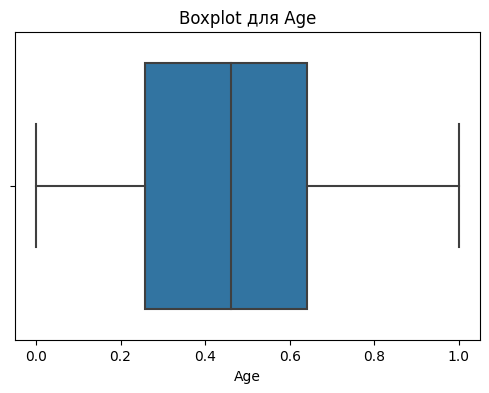

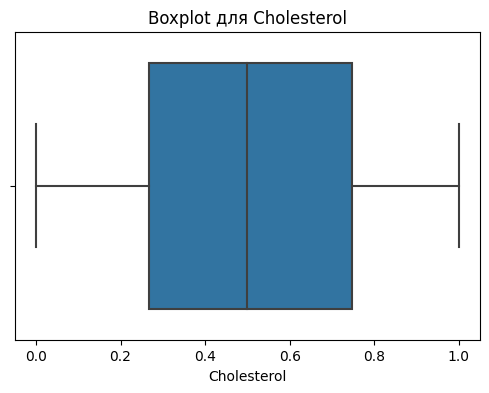

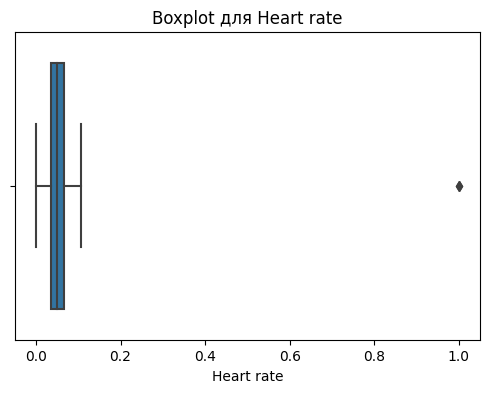

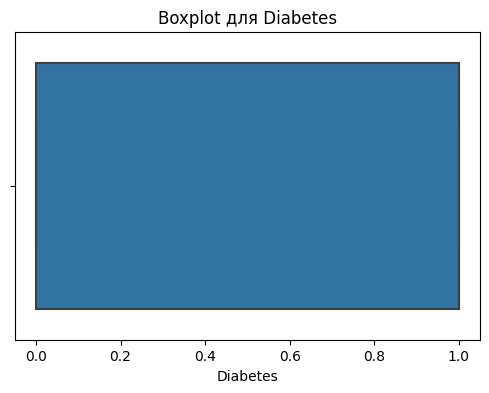

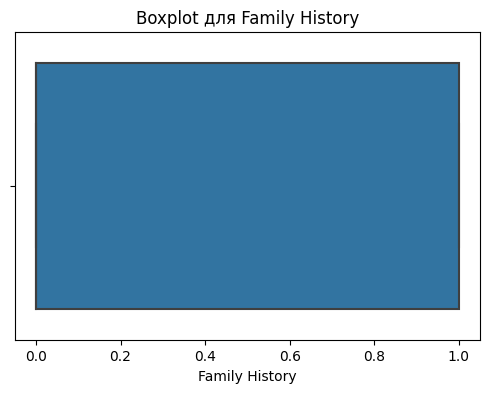

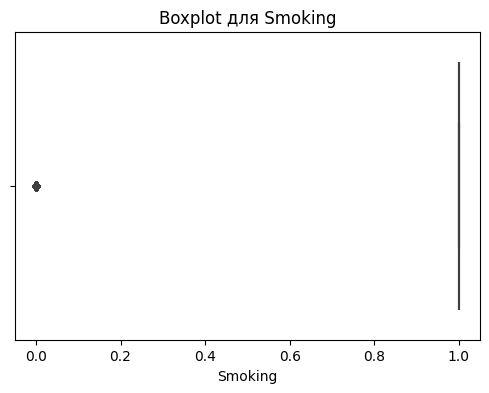

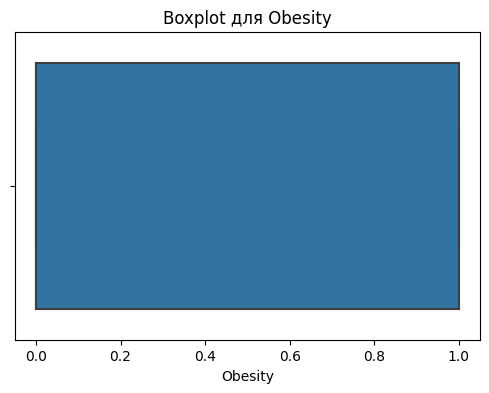

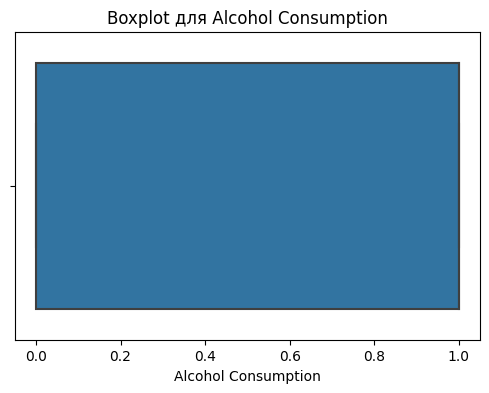

In [47]:
# Boxplot по ключевым признакам для поиска выбросов
for col in numerical_cols[:8]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot для {col}")
    plt.show()

In [48]:
# Проверим уникальные значения для Gender
print(df['Gender'].value_counts())

Gender
Male      5882
Female    2560
1.0        156
0.0         87
Name: count, dtype: int64


In [49]:
# Проверим корреляцию с целевой переменной
correlation_with_target = df.select_dtypes(include=['number']).corr()["Heart Attack Risk (Binary)"].sort_values(ascending=False)
print("Корреляция признаков с таргетом:\n", correlation_with_target)

Корреляция признаков с таргетом:
 Heart Attack Risk (Binary)         1.000000
Systolic blood pressure            0.033762
Cholesterol                        0.018920
Diabetes                           0.016213
Triglycerides                      0.012062
Diastolic blood pressure           0.011967
Exercise Hours Per Week            0.009487
Income                             0.008218
Troponin                           0.007608
Age                                0.004651
Family History                     0.002922
Sedentary Hours Per Day            0.001769
Previous Heart Problems            0.001691
Blood sugar                        0.001104
Medication Use                     0.000460
Smoking                           -0.005291
Stress Level                      -0.005735
BMI                               -0.006824
CK-MB                             -0.009821
Physical Activity Days Per Week   -0.012515
Alcohol Consumption               -0.014546
Obesity                           -0.01508

In [50]:
outliers = df[df['Heart rate'] > 0.9]
print(outliers)


           Age  Cholesterol  Heart rate  Diabetes  Family History  Smoking  \
1377  0.629213      0.49978         1.0       NaN             NaN      NaN   
2712  0.202247      0.49978         1.0       NaN             NaN      NaN   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
1377      NaN                  NaN                  0.50211     3  ...   
2712      NaN                  NaN                  0.50211     3  ...   

      Physical Activity Days Per Week  Sleep Hours Per Day  \
1377                              NaN             0.504621   
2712                              NaN             0.504621   

      Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  Gender  \
1377                         0.0     0.203557  0.011843  0.002622     0.0   
2712                         0.0     0.092885  0.007805  0.000680     0.0   

      Systolic blood pressure  Diastolic blood pressure    id  
1377                 0.490323                  0.616279  95

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
